In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tAvWUB4eclRbRZAFozjh62sYSEIdhy6NIKFd3DKe1KV2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystemfo-donotdelete-pr-mkibdvxx4g0edc'
object_key = 'Fertilizers_Recommendation_System_For_Disease_Prediction.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1)

In [3]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [4]:
pwd

'/home/wsuser/work'

In [5]:
import os
filenames=os.listdir("/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/train_set")


In [6]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/train_set',target_size=(128,128),batch_size=2,class_mode='categorical')
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),batch_size=2,class_mode="categorical")

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [7]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [9]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=300,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=150,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(units=9,kernel_initializer='random_uniform',activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [10]:
model.fit(x_train,steps_per_epoch=100,epochs=20,validation_data=x_test,validation_steps=27)

Epoch 1/20
100/100 [==============================] - 61s 605ms/step - loss: 2.3678 - accuracy: 0.1400 - val_loss: 45.9375 - val_accuracy: 0.2593
Epoch 2/20
100/100 [==============================] - 60s 599ms/step - loss: 2.1621 - accuracy: 0.1700 - val_loss: 76.1214 - val_accuracy: 0.2778
Epoch 3/20
100/100 [==============================] - 60s 599ms/step - loss: 2.0042 - accuracy: 0.2600 - val_loss: 158.2078 - val_accuracy: 0.2963
Epoch 4/20
100/100 [==============================] - 60s 604ms/step - loss: 1.8722 - accuracy: 0.3150 - val_loss: 169.9833 - val_accuracy: 0.3889
Epoch 5/20
100/100 [==============================] - 60s 602ms/step - loss: 1.7628 - accuracy: 0.3100 - val_loss: 305.9255 - val_accuracy: 0.3148
Epoch 6/20
100/100 [==============================] - 61s 606ms/step - loss: 1.5962 - accuracy: 0.3800 - val_loss: 169.7086 - val_accuracy: 0.3889
Epoch 7/20
100/100 [==============================] - 60s 597ms/step - loss: 1.7292 - accuracy: 0.3850 - val_loss: 304.0

In [11]:
model.save('veg.h5')

In [12]:
!tar -zcvf veg_disease_classification_model_new.tgz veg.h5

veg.h5


In [13]:
ls -1

Fertilizers_Recommendation_System_For_Disease_Prediction/
fruit_disease_classification_model_new.tgz
fruit.h5
fruit_model.tar.gz
veg_disease_classification_model_new.tgz
veg.h5
veg_model.tar.gz


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 9)                 1359      
                                                        

In [15]:
!pip install watson-machine-learning-client --upgrade

In [16]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"dTl6oleSifcoSDxQyHGMUgZfsHppoP68EgnOanTVItW_"
                  }

client = APIClient(wml_credentials)

In [17]:
client=APIClient(wml_credentials)
print(client)

In [18]:
space_uid="f1ee56c4-52ae-4545-bab9-8abf3ac27e0a"

In [19]:
client.set.default_space(space_uid)

'SUCCESS'

In [20]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [21]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [22]:
model_details = client.repository.store_model(model= 'veg_disease_classification_model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )
model_id = client.repository.get_model_id(model_details)
model_id


'3fc8b158-52b3-49a0-b6dc-0eb986bde4bf'

In [23]:
ls

Fertilizers_Recommendation_System_For_Disease_Prediction/
fruit_disease_classification_model_new.tgz
fruit.h5
fruit_model.tar.gz
veg_disease_classification_model_new.tgz
veg.h5
veg_model.tar.gz


In [24]:
client.repository.download(model_id,"veg_model.tar.gz")

File with name: 'veg_model.tar.gz' already exists.


WMLClientError: File with name: 'veg_model.tar.gz' already exists.

In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('veg.h5')

In [26]:
from keras_preprocessing.image import load_img,img_to_array
img=load_img("/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0bb97c36-159d-4ee2-8b06-1fbf3f533af5___JR_HL 8345.JPG",target_size=(128,128))

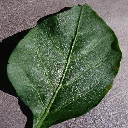

In [27]:
img

In [28]:

x=img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Pepper,_bell___healthy'